In [1]:
#importing libraries 

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
#reading and loading images

'''
Rescale the image such that their pixel values are normalized between 0 and 1 
without affecting the image quality which will make it easier to train the CNN.
'''
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


train_dataset = train.flow_from_directory(r"C:\Users\user\Desktop\Current Projects\new_dataset\train",
                                          target_size=(200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\user\Desktop\Current Projects\new_dataset\val",
                                          target_size=(200,200),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
# encoded class labels by running below code
test_dataset.class_indices

{'cheetah_validation': 0, 'jaguar_validation': 1}

In [4]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cheetah or 1 for Jaguar 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.fit_generator(train_dataset,
         steps_per_epoch = 30,
         epochs = 10,
         validation_data = test_dataset)

C:\Users\user\anaconda3\envs\PythonML\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 49s 2s/step - loss: 0.7078 - accuracy: 0.5531 - val_loss: 0.6777 - val_accuracy: 0.5800
Epoch 2/10
30/30 [==============================] - 45s 2s/step - loss: 0.5665 - accuracy: 0.7219 - val_loss: 0.4745 - val_accuracy: 0.8050
Epoch 3/10
30/30 [==============================] - 46s 2s/step - loss: 0.3782 - accuracy: 0.8439 - val_loss: 0.4378 - val_accuracy: 0.8100
Epoch 4/10
30/30 [==============================] - 45s 1s/step - loss: 0.3521 - accuracy: 0.8452 - val_loss: 0.3499 - val_accuracy: 0.8550
Epoch 5/10
30/30 [==============================] - 46s 2s/step - loss: 0.3366 - accuracy: 0.8456 - val_loss: 0.3145 - val_accuracy: 0.8800
Epoch 6/10
30/30 [==============================] - 52s 2s/step - loss: 0.2823 - accuracy: 0.8868 - val_loss: 0.2841 - val_accuracy: 0.8900
Epoch 7/10
30/30 [==============================] - 53s 2s/step - loss: 0.2837 - accuracy: 0.8897 - val_loss: 0.3574 - val_accuracy: 0.8650
Epoch 8/10
30/30 [==

In [7]:
tf.keras.models.save_model(model,'model_2.hdf5')

In [9]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(200,200))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("JAGUAR",fontsize=30)
        
    elif val == 0:
        
        plt.xlabel("CHEETAH",fontsize=30)

[[1.]]


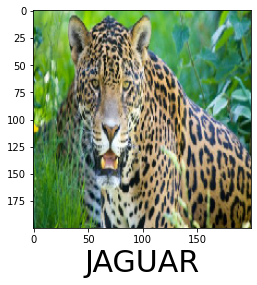

In [10]:
predictImage(r"C:\Users\user\Desktop\Current Projects\datasets_filter\jaguars\az_jaguar1-520x294.jpg")

[[1.]]


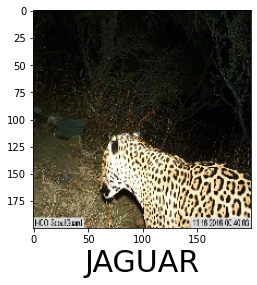

In [14]:
predictImage(r"C:\Users\user\Downloads\dos_cabezas_jaguar_2017-03-03.jpg")

In [8]:
!pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=6711a766c13efd4bd1459212292f82a5aeb9b1dc2451d9a06d33aa49f5cf2214
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\f5\18\df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker


In [9]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('C:\Users\user\Desktop\Current Projects\Jaguar_vs_Cheetah\model_2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Jaguar Vs Cheetah
         """
         )

file = st.file_uploader("Please upload an image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (200,200)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        #img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.sigmoid(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Writing app.py


In [15]:
!pip install pyngrok

In [16]:
!ngrok authtoken c:\users\user\anaconda3\envs\pythonml\lib\site-packages

Authtoken saved to configuration file: C:\Users\user/.ngrok2/ngrok.yml


In [18]:
!nohup streamlit run app.py &

OSError: Background processes not supported.

In [19]:
get_ipython().system_raw('./ngrok http 8501 &')

In [21]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.
